In [37]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt



In [38]:
df = pd.read_csv("G:\humg\Trí tuệ nhận tạo + BTL(3)\BTL\BostonHousing.csv")
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
dataset = df.values

X = dataset[:,0:13]
Y = dataset[:,13]

In [54]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential([
    Dense(13, activation='relu', input_shape=(13,)),
    Dense(13, activation='relu'),
    Dense(1),
])

In [45]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, Y_train,
          batch_size=13, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
28/28 [==============================] - 0s 7ms/step - loss: 561.4193 - accuracy: 0.0000e+00 - val_loss: 615.6385 - val_accuracy: 0.0000e+00
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 538.4472 - accuracy: 0.0000e+00 - val_loss: 587.6779 - val_accuracy: 0.0000e+00
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 504.1318 - accuracy: 0.0000e+00 - val_loss: 543.9888 - val_accuracy: 0.0000e+00
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 452.4543 - accuracy: 0.0000e+00 - val_loss: 479.4789 - val_accuracy: 0.0000e+00
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 380.4165 - accuracy: 0.0000e+00 - val_loss: 391.7448 - val_accuracy: 0.0000e+00
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 290.8580 - accuracy: 0.0000e+00 - val_loss: 293.4377 - val_accuracy: 0.0000e+00
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 206.1054 

In [47]:
model.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 1ms/step - loss: 27.3959 - accuracy: 0.0000e+00


0.0

In [48]:
import matplotlib.pyplot as plt

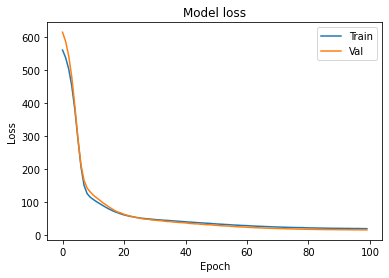

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()